<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/classifica%C3%A7%C3%A3o/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texto em itálico*

# Carregamento dos dados

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

names = [
         "NUM_CURSOS",
         "CODIGO_IES",
         "DEFICIENCIA_FISICA",
         "DEFICIENCIA_VISUAL",
         "DEFICIENCIA_AUDITIVA", 
         "DEFICIENCIA_COGNITIVA", 
         "DEFICIENCIA_MULTIPLA", 
         "RECURSOS_DEF_FISICA",
         "RECURSOS_DEF_VISUAL", 
         "RECURSOS_DEF_AUDITIVA", 
         "RECURSOS_DEF_COGNITIVA",
         "RECURSOS_DEF_MULTIPLA"
         ]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(names)
names=le.transform(names)

dataset = pd.read_csv("dados_ies_sem_nan_utf8.csv", index_col=0, encoding="utf8")

#Substitui NaN por 0
#dataset.fillna("NaN", inplace=True)

#dataset.dropna(subset=["TIPO_CATEGORIA_ADM"], inplace=True)

#print(set(dataset["TIPO_CATEGORIA_ADM"]))

# Categorização e mapeamento dos dados de strings para inteiros

In [61]:
from sklearn import preprocessing
from copy import deepcopy

u = deepcopy(dataset)

le = preprocessing.LabelEncoder()

le.fit(dataset["TIPO_CATEGORIA_ADM"])
dataset["TIPO_CATEGORIA_ADM"]=le.transform(dataset["TIPO_CATEGORIA_ADM"])
le_name_mapping_1 = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(dataset["REGIAO"])
dataset["REGIAO"]=le.transform(dataset["REGIAO"])
le_name_mapping_2 = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(dataset["UF"])
dataset["UF"]=le.transform(dataset["UF"])
le_name_mapping_3 = dict(zip(le.classes_, le.transform(le.classes_)))

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

import json
a = json.dumps(le_name_mapping_1, default=np_encoder, indent=True, ensure_ascii=False)
b = json.dumps(le_name_mapping_2, default=np_encoder, indent=True, ensure_ascii=False)
c = json.dumps(le_name_mapping_3, default=np_encoder, indent=True, ensure_ascii=False)

ff = '{'
ff += f'\n"TIPO_CATEGORIA_ADM": [\n{a}\n],\n"REGIAO": [\n{b}\n],\n"UF": [\n{c}\n]'
ff += '\n}'

f = open("mapa_categorias.json", "w")
f.write(ff)
f.close()

dataset.to_csv("dados_ies_categorizados.csv")


# Predição do dataset utilizando KNN

Processa células não padronizadas (células vazias)

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in dataset.columns:
  if dataset[i].dtype == object:
    dataset[i] = le.fit_transform(dataset[i])
  else:
    pass

dataset_encoded = le.fit_transform(dataset.columns)

Normaliza os dados usando StandardScaler e treina o modelo

In [124]:
X = dataset.drop(columns=[
                          "REGIAO", 
                          "TIPO_CATEGORIA_ADM", 
                          "UF", 
                          "CODIGO_IES", 
                          "NUM_CURSOS",
                          "DEFICIENCIA_AUDITIVA",
                          "DEFICIENCIA_VISUAL",
                          "DEFICIENCIA_COGNITIVA",
                          "DEFICIENCIA_MULTIPLA",
                          "RECURSOS_DEF_VISUAL",
                          "RECURSOS_DEF_AUDITIVA",
                          "RECURSOS_DEF_COGNITIVA",
                          "RECURSOS_DEF_MULTIPLA"
                          ])
y = dataset["REGIAO"].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

Cria o objeto KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 4, 2, 4, 1, 1, 4, 2, 2, 1, 1,
       4, 2, 1, 2, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       5, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 4, 1, 1, 1, 2, 2, 2,
       2, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 4, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 4, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 4, 1, 2, 1, 4, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 4, 1, 2, 2, 1, 4,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1])

Faz a predição

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:\n")
print(accuracy_score(y_test, y_pred))

Confusion matrix:

[[  5   9   1  46   3]
 [  7  24   4  68  10]
 [  4   9   0  28   3]
 [ 19  42   6 156  16]
 [  6  25   1  51   9]]

Classification report:

              precision    recall  f1-score   support

           0       0.12      0.08      0.10        64
           1       0.22      0.21      0.22       113
           2       0.00      0.00      0.00        44
           3       0.45      0.65      0.53       239
           4       0.22      0.10      0.14        92

    accuracy                           0.35       552
   macro avg       0.20      0.21      0.20       552
weighted avg       0.29      0.35      0.31       552

Accuracy:

0.35144927536231885


Text(0, 0.5, 'Mean Error')

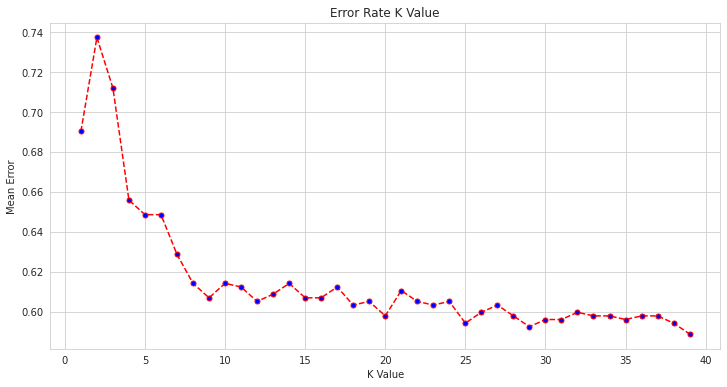

In [127]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [89]:
X_train

,DEFICIENCIA_FISICA,RECURSOS_DEF_FISICA
1612,0.0,0.000000
2052,2.0,0.000000
794,2.0,0.714286
1714,0.0,1.000000
2105,2.0,4.000000
...,...,...
1048,7.0,1.666667
1791,0.0,1.200000
1679,21.0,4.250000
1265,0.0,2.400000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


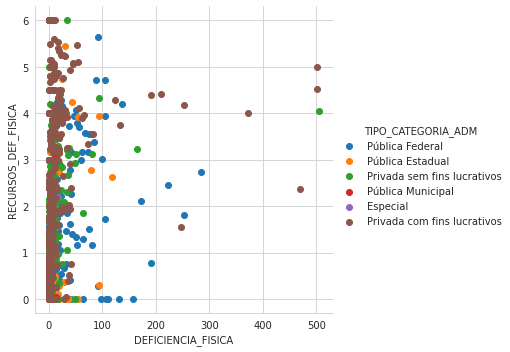

In [128]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="TIPO_CATEGORIA_ADM", size=5).map(plt.scatter, "DEFICIENCIA_FISICA", "RECURSOS_DEF_FISICA").add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


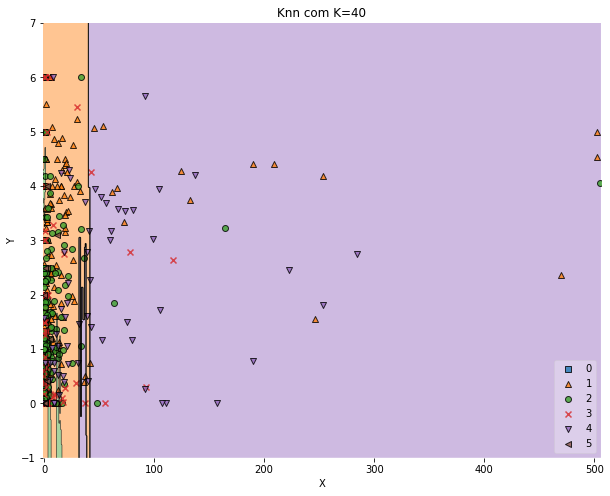

In [119]:

def knn_comparison(X, y, k):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X, y)
  value=1.5
  width=0.75
# Plotting decision region
  plt.figure(figsize=(10, 8))
  plot_decision_regions(
     X.to_numpy(), 
     y, 
     clf=clf, 
     legend=4
     )
# Adding axes annotations
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Knn com K=" + str(k))
  plt.show()

for i in [40]:
  knn_comparison(X_train, y_train, i)

In [132]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="weighted"))


Accuracy: 0.4329710144927536
Precision: 0.18746389939088426
Recall: 0.4329710144927536


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
